In [1]:
# importing libraries
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import numpy as np                    # mathematical essentials
import pylab
import math

from scipy import stats

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# specifying file name
file = './__datasets/birthweight_low.xlsx'
df_birthwt = pd.read_excel(file)

# Removing junk data
df_birthweight = df_birthwt.iloc[ : , 0:18 ]

# Imputing values
meduc_median = df_birthweight['meduc'].median()
df_birthweight['meduc'].fillna(value = meduc_median,
                         inplace = True)

npvis_median = df_birthweight['npvis'].median()
df_birthweight['npvis'].fillna(value = npvis_median,
                         inplace = True)

feduc_median = df_birthweight['feduc'].median()
df_birthweight['feduc'].fillna(value = feduc_median,
                         inplace = True)

df_birthweight.head(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,14.0,5,2.0,62,14.0,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
mage,1.000000,-0.094028,0.164198,-0.051656,0.583608,-0.086760,-0.211302,-0.238031,0.167293,0.336698,-0.049694,0.007738,-0.024107,0.017395,-0.082203,0.035503,0.048140,-0.463811
meduc,-0.094028,1.000000,-0.232228,0.137913,-0.069698,0.619529,0.249224,0.140437,0.103739,-0.071381,-0.033436,-0.284530,-0.193431,0.463016,-0.184906,-0.233591,0.429406,0.094206
monpre,0.164198,-0.232228,1.000000,-0.342874,0.042767,-0.286874,-0.168007,-0.084856,-0.058436,0.015553,-0.075269,0.075486,0.134837,-0.208120,0.037708,0.032603,-0.072167,-0.051827
npvis,-0.051656,0.137913,-0.342874,1.000000,-0.062502,0.024629,0.091358,0.087839,0.037018,-0.067520,0.003469,0.040307,-0.093286,0.057642,0.034802,-0.067940,0.033823,0.062091
fage,0.583608,-0.069698,0.042767,-0.062502,1.000000,-0.013147,-0.157184,-0.196277,0.174795,0.291435,-0.085186,0.035367,-0.057187,0.025391,-0.027247,-0.032996,0.061815,-0.395985
feduc,-0.086760,0.619529,-0.286874,0.024629,-0.013147,1.000000,0.326497,0.127714,0.049043,-0.122493,0.075458,-0.414750,-0.125733,0.515404,-0.357027,-0.150448,0.521183,0.131273
omaps,-0.211302,0.249224,-0.168007,0.091358,-0.157184,0.326497,1.000000,0.640958,-0.149436,-0.175694,-0.012647,-0.177331,-0.023638,0.189610,-0.117133,-0.006771,0.127358,0.250153
fmaps,-0.238031,0.140437,-0.084856,0.087839,-0.196277,0.127714,0.640958,1.000000,-0.094834,-0.157919,-0.033829,-0.019572,-0.069815,0.089551,0.007070,-0.043160,0.036947,0.252024
cigs,0.167293,0.103739,-0.058436,0.037018,0.174795,0.049043,-0.149436,-0.094834,1.000000,0.355779,-0.115098,0.033570,-0.197749,0.170593,-0.007297,-0.193035,0.205261,-0.572385
drink,0.336698,-0.071381,0.015553,-0.067520,0.291435,-0.122493,-0.175694,-0.157919,0.355779,1.000000,-0.092433,0.164619,-0.111658,-0.039600,0.071382,-0.095792,0.024750,-0.743125


<AxesSubplot:>

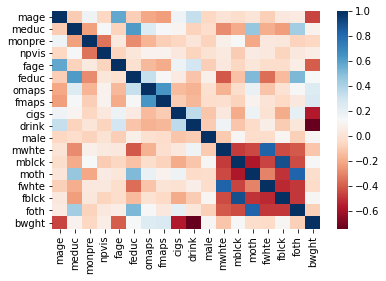

In [2]:
# Checking multicollinearity
corr = df_birthweight.corr()
display(corr)
# Checking the heatmap
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap="RdBu")

In [3]:
df_birthweight_before = df_birthweight
# Dropping the correlated columns
df_birthweight_after = df_birthweight.drop(['mwhte','fwhte','mblck','fblck','moth','foth'], axis = 1)

# Testing multicollinearity using variance_inflation_factor
X1 = sm.tools.add_constant(df_birthweight_before)
X2 = sm.tools.add_constant(df_birthweight_after)

series_before = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])], index = X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])], index = X2.columns)

# Printing data to check the result set
print('Data Before')
print('-'*100)
display(series_before)

print('Data After')
print('-'*100)
display(series_after)

Data Before
----------------------------------------------------------------------------------------------------


C:\Users\rohan\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\rohan\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const     0.000000
mage      1.850833
meduc     1.828881
monpre    1.434170
npvis     1.194778
fage      1.601532
feduc     2.273500
omaps     1.973872
fmaps     1.814304
cigs      1.670009
drink     2.345992
male      1.072470
mwhte          inf
mblck          inf
moth           inf
fwhte          inf
fblck          inf
foth           inf
bwght     3.588746
dtype: float64

Data After
----------------------------------------------------------------------------------------------------


const     485.063714
mage        1.771196
meduc       1.719321
monpre      1.295465
npvis       1.182206
fage        1.595628
feduc       1.885570
omaps       1.951373
fmaps       1.793568
cigs        1.641295
drink       2.295113
male        1.048019
bwght       3.561932
dtype: float64

In [4]:
# Using Linear regression (sikit learn)
X = df_birthweight_after.drop('bwght', axis = 1)
Y = df_birthweight_after[['bwght']]

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=219)

#Standardization

from sklearn.preprocessing import StandardScaler
# define the scaler
scaler = StandardScaler()
# fit on the training dataset
scaler.fit(X_train)
# scale the training dataset
x_train = scaler.transform(X_train)
# scale the test dataset
x_test = scaler.transform(X_test)

regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

# Predict the values and check the output
y_predict = regression_model.predict(X_test)
y_predict[:5]

array([[3507.99065722],
       [3874.89003582],
       [3480.90578456],
       [4332.13924134],
       [2688.46762895]])

In [5]:
# Checking the summary of regression
X2 = sm.add_constant(X)
model = sm.OLS(Y, X2)
est = model.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     42.85
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           6.09e-45
Time:                        20:54:16   Log-Likelihood:                -1421.6
No. Observations:                 196   AIC:                             2867.
Df Residuals:                     184   BIC:                             2907.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3941.4970    472.778      8.337      0.0

In [6]:
import math
from sklearn.metrics import mean_squared_error

# Removing high probability variables
df_birthweight_after = df_birthweight_after.drop(['monpre','npvis','omaps','male'], axis = 1)
X = df_birthweight_after.drop('bwght', axis = 1)
Y = df_birthweight_after[['bwght']]

# Performing linear regression again
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=219)
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

y_predict = regression_model.predict(X_test)
X2 = sm.add_constant(X)
model = sm.OLS(Y, X2)
est = model.fit()

# Checking the summary result
print(est.summary())

model_mse = mean_squared_error(y_test, y_predict)
model_rmse = math.sqrt(model_mse)

# Checking RMSE
print("RMSE {:.3}".format(model_rmse))


                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     68.63
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.97e-48
Time:                        20:54:16   Log-Likelihood:                -1421.8
No. Observations:                 196   AIC:                             2860.
Df Residuals:                     188   BIC:                             2886.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4004.9233    427.287      9.373      0.0

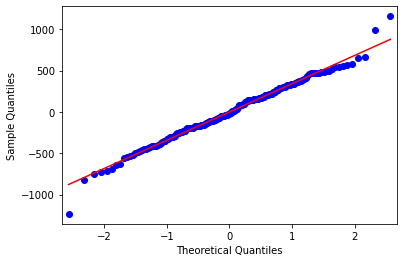

-6.324700400594394e-12


In [7]:
# Checking whether the residuals are normaly distributed
sm.qqplot(est.resid, line='s')

# Display the graph
pylab.show()
mean_resid = sum(est.resid)/len(est.resid)

# Print mean of residuals
print(mean_resid)

In [8]:
# Removing insignificant variables
df_birthweight_after = df_birthweight_after.drop(['feduc','meduc'], axis = 1)

# Performing linear regression again 
X = df_birthweight_after.drop('bwght', axis = 1)
Y = df_birthweight_after[['bwght']]

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=219)
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

y_predict = regression_model.predict(X_test)
X2 = sm.add_constant(X)
model = sm.OLS(Y, X2)
est = model.fit()

# Checking the result
print(est.summary())

# Printing the scores
print('OLS Training Score :', abs(regression_model.score(X_train, y_train)).round(4))  # using R-square
print('OLS Testing Score  :',  abs(regression_model.score(X_test, y_test)).round(4)) # using R-square

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     95.08
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           8.42e-50
Time:                        20:54:16   Log-Likelihood:                -1423.3
No. Observations:                 196   AIC:                             2859.
Df Residuals:                     190   BIC:                             2878.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4226.7312    406.125     10.407      0.0

In [9]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
lasso_reg = Lasso(alpha=1)

lasso_reg.fit(X_train,y_train)
y_pred = lasso_reg.predict(X_test)

train_score1 = lasso_reg.score(X_train,y_train)
test_score1 = lasso_reg.score(X_test, y_test)

# Printing the scores and gap betwen test and train
print("Lasso Regression training score:- ", abs(train_score1).round(4))
print("Lasso Regression testing score:- ",abs(test_score1).round(4))
diff=train_score1-test_score1
print("Train-Test Gap of Lasso Regression:- ",abs(diff).round(4))

Lasso Regression training score:-  0.7227
Lasso Regression testing score:-  0.6516
Train-Test Gap of Lasso Regression:-  0.0711


In [10]:
# Removing insignificant variables
df_birthweight_after = df_birthweight_after.drop(['mage'], axis = 1)

# Performing linear regression again 
X = df_birthweight_after.drop('bwght', axis = 1)
Y = df_birthweight_after[['bwght']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 219)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_predict = regression_model.predict(X_test)
X2 = sm.add_constant(X)
model = sm.OLS(Y, X2)
est = model.fit()

# Checking the summary result
print(est.summary())

# SCORING the results
print('OLS Training Score :', regression_model.score(X_train, y_train).round(4))  # using R-square
print('OLS Testing Score  :',  regression_model.score(X_test, y_test).round(4)) # using R-square

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     109.7
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           2.19e-48
Time:                        20:54:16   Log-Likelihood:                -1429.2
No. Observations:                 196   AIC:                             2868.
Df Residuals:                     191   BIC:                             2885.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3911.1452    406.567      9.620      0.0

In [11]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
lasso_reg = Lasso(alpha=1)

lasso_reg.fit(X_train,y_train)
y_pred = lasso_reg.predict(X_test)

train_score1 = lasso_reg.score(X_train,y_train)
test_score1 = lasso_reg.score(X_test, y_test)

# Printing the result
print("Lasso Regression training score:- ",abs(train_score1).round(4))
print("Lasso Regression testing score:- ",abs(test_score1).round(4))
dif = abs(train_score1).round(4) - abs(test_score1)
print("Train-Test Gap of Lasso Regression:- ", abs(dif).round(4))

Lasso Regression training score:-  0.6904
Lasso Regression testing score:-  0.7107
Train-Test Gap of Lasso Regression:-  0.0203


In [12]:
# Removing insignificant variable
df_birthweight_after = df_birthweight_after.drop(['fmaps'], axis = 1)

# Performing linear regression again 
X = df_birthweight_after.drop('bwght', axis = 1)
Y = df_birthweight_after[['bwght']]

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=219)
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

y_predict = regression_model.predict(X_test)
X2 = sm.add_constant(X)
model = sm.OLS(Y, X2)
est = model.fit()

ols_train_score=regression_model.score(X_train, y_train)
ols_test_score=regression_model.score(X_test, y_test)

diff = abs(ols_train_score).round(4) - abs(ols_test_score).round(4)

# Checking the result
print(est.summary())

# Printing the results for scores
print('OLS Training Score :', regression_model.score(X_train, y_train).round(4))  # using R-square
print('OLS Testing Score  :',  regression_model.score(X_test, y_test).round(4)) # using R-square
print("Train-Test Gap of OLS Regression:- ",abs(diff).round(4))

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     140.5
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           3.40e-48
Time:                        20:54:16   Log-Likelihood:                -1432.3
No. Observations:                 196   AIC:                             2873.
Df Residuals:                     192   BIC:                             2886.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4873.2066    120.397     40.476      0.0

In [13]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
lasso_reg = Lasso(alpha=1)

lasso_reg.fit(X_train,y_train)
y_pred = lasso_reg.predict(X_test)

# Calculate score
lasso_train_score = lasso_reg.score(X_train,y_train)
lasso_test_score  = lasso_reg.score(X_test, y_test)

# Printing the scores for test, train and Gap
print("Lasso Regression training score:- ", abs(lasso_train_score).round(4))
print("Lasso Regression testing score:- ", abs(lasso_test_score).round(4))

diff1 = abs(lasso_train_score).round(4) - abs(lasso_test_score).round(4)
print("Train-Test Gap of Lasso Regression:- ", abs(diff1).round(4))

Lasso Regression training score:-  0.6757
Lasso Regression testing score:-  0.7251
Train-Test Gap of Lasso Regression:-  0.0494


In [14]:
# KNN Model
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=17)
knn.fit(X_train,y_train)

# Calculate score
knn_train_score=knn.score(X_train,y_train)
knn_test_score=knn.score(X_test, y_test)

# Print Score
print("KNN Model training score:- ", abs(knn_train_score).round(4))
print("KNN Model testing score:- ",abs(knn_test_score).round(4))
diff2 = abs(knn_train_score).round(4) - abs(knn_test_score).round(4)
print("Train-Test Gap of KNN Model:- ", abs(diff2).round(4))

KNN Model training score:-  0.6144
KNN Model testing score:-  0.5474
Train-Test Gap of KNN Model:-  0.067


In [15]:
#ARD Regression Model
from sklearn import linear_model
clf = linear_model.ARDRegression(n_iter=17)
clf.fit(X_train,y_train)

#Calculate score
ard_train_score = clf.score(X_train,y_train)
ard_test_score = clf.score(X_test, y_test)

#Print Score
print("ARD Regression training score:- ",abs(ard_train_score).round(4))
print("ARD Regression testing score:- ",abs(ard_test_score).round(4))
diff3 = abs(ard_train_score).round(4) - abs(ard_test_score).round(4)
print("Train-Test Gap of ARD Regression:- ", abs(diff3.round(4)))

ARD Regression training score:-  0.6756
ARD Regression testing score:-  0.7278
Train-Test Gap of ARD Regression:-  0.0522


C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [16]:
# Preparing variables for final output
O_train = abs(ols_train_score).round(4)
O_test = abs(ols_test_score).round(4)
O_Gap = abs(diff).round(4)
L_train = abs(lasso_train_score).round(4)
L_test = abs(lasso_test_score).round(4)
L_Gap = abs(diff1).round(4)
A_train = abs(ard_train_score).round(4)
A_test = abs(ard_test_score).round(4)
A_Gap = abs(diff3).round(4)
K_train = abs(knn_train_score).round(4)
K_test = abs(knn_test_score).round(4)
K_Gap = abs(diff2).round(4)

# Printing final output
print(f"""
Model      Train Score    Test Score    Test - Train Gap
-----      -----------    ----------    ----------------
OLS        {O_train}          {O_test}        {O_Gap}
Lasso      {L_train}          {L_test}        {L_Gap} (I select this model)
ARD        {A_train}          {A_test}        {A_Gap}
KNN        {K_train}          {K_test}        {K_Gap}
""")


Model      Train Score    Test Score    Test - Train Gap
-----      -----------    ----------    ----------------
OLS        0.6757          0.7252        0.0495
Lasso      0.6757          0.7251        0.0494 (I select this model)
ARD        0.6756          0.7278        0.0522
KNN        0.6144          0.5474        0.067

